In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as plotly_express
from sklearn import decomposition



In [2]:
curr_dir=os.getcwd()
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df=df.drop("index", axis=1)
features = df.drop(["Patient Id","Level"], axis=1)
labels = df["Level"]

In [4]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


#### Trying to prove linear separability using features selected from info gain 

In [5]:
#Feature importance based on PCA with n_components=3
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

#features selected using Method 3
feature_set_dt=['Coughing of Blood',
 'Wheezing',
 'Obesity',
 'Snoring',
 'Air Pollution',
 'Clubbing of Finger Nails',
 'Swallowing Difficulty'
 ]

feature_set_rf=[
    'Coughing of Blood',
    'Fatigue',
    'Alcohol use',
    'Smoking',
    'Genetic Risk',
    'OccuPational Hazards',
    'Chest Pain',
    'chronic Lung Disease',
    'Age'
]

#### Overall PCA 

In [6]:

def pca_transform(x, y, n_comp):
  pc_list = [f"PC{i+1}" for i in range(n_comp)]
  pca = decomposition.PCA(n_components=n_comp)
  pc = pca.fit_transform(x)
  pc_df = pd.DataFrame(data=pc,columns=pc_list)
  pc_df['Label'] = y
  return pc_df, pca, pc_list

def plot_PCA_2D(pc_df, pca, pc_list):
    # variance explained by PCs
    # PC1 + PC2 explains 78% variance 
    var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
                'PC':pc_list})

    sns.barplot(x='PC',y="Variance", 
            data=var)
    sns.lmplot( x="PC1", y="PC2",
    data=pc_df, 
    fit_reg=False, 
    hue='Label', # color by cluster
    legend=True,
    scatter_kws={"s": 80}) # specify the point size

def plot_PCA_3D(pc_df, pca):
    pca_var_sum=sum(pca.explained_variance_ratio_[:4])
    
    figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label")
    figure.update_layout(showlegend=True)
    figure.show()

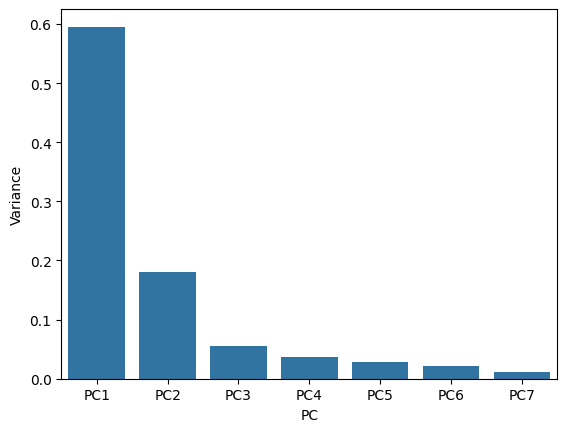

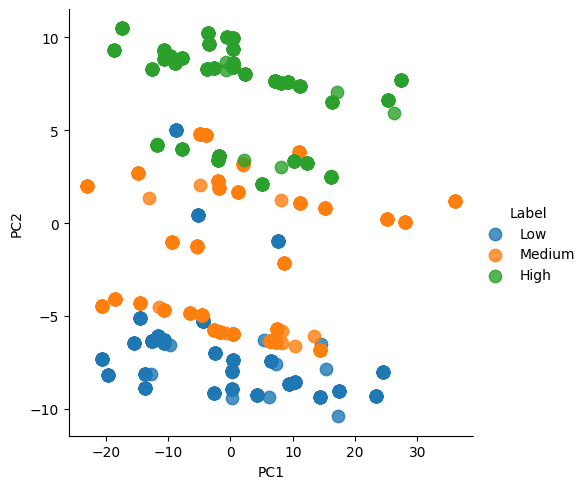

In [7]:
x=df.drop(["Patient Id","Level"], axis=1)
y=df["Level"]
n_comp=7
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

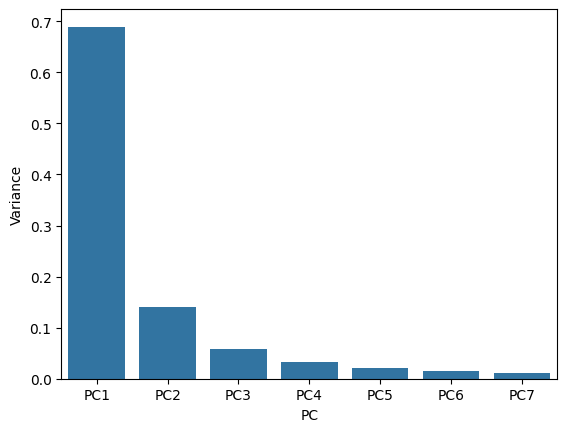

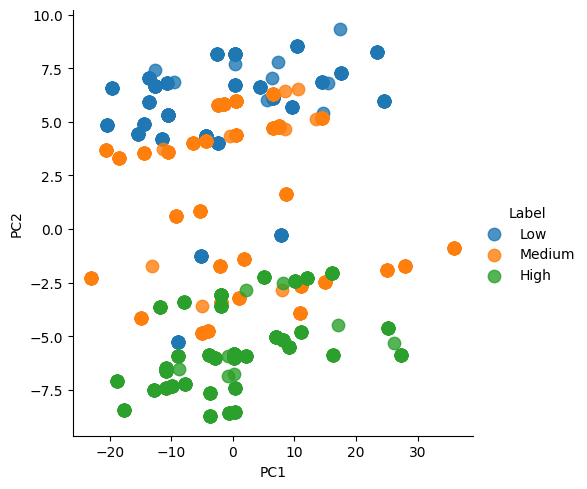

In [8]:
x=df.drop(["Patient Id","Level"], axis=1)
x=x[f_pca]
y=df["Level"]
n_comp=7
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

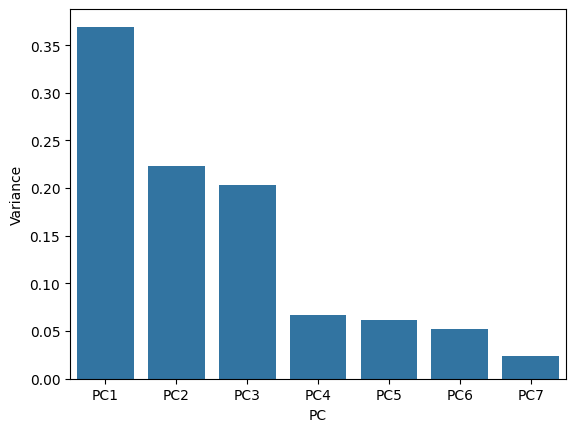

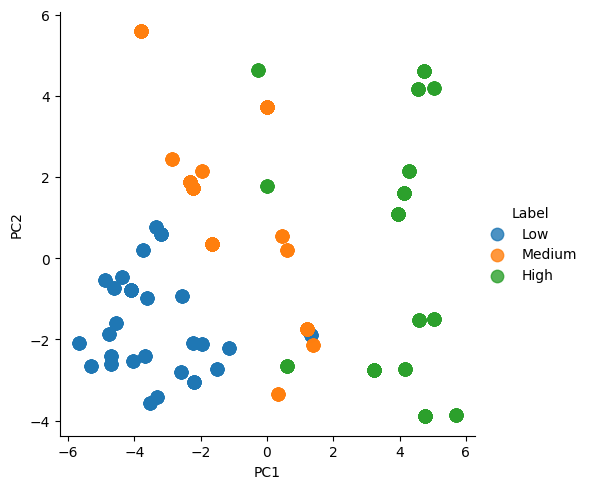

In [9]:
x=df.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df["Level"]
n_comp=7
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [10]:
# print(f'Sum of pca variance for PCA 1 - 3: {pca_var_sum}')
plot_PCA_3D(pc_df, pca)

The separation for PCA seems to be better when features were selected from decision tree feature importance (feature_set_dt)

#### Separate by classes [Low vs (Medium & High)]

In [11]:
df_low_others = df.copy()
df_low_others["Level"] = df['Level'].replace(["Medium","High"],"medium_high")
pd.unique(df_low_others['Level'])


array(['Low', 'medium_high'], dtype=object)

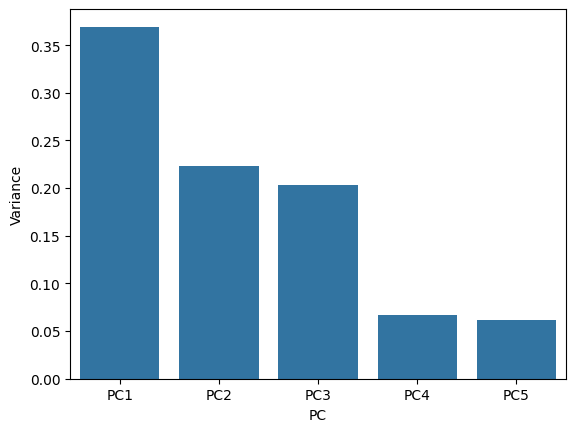

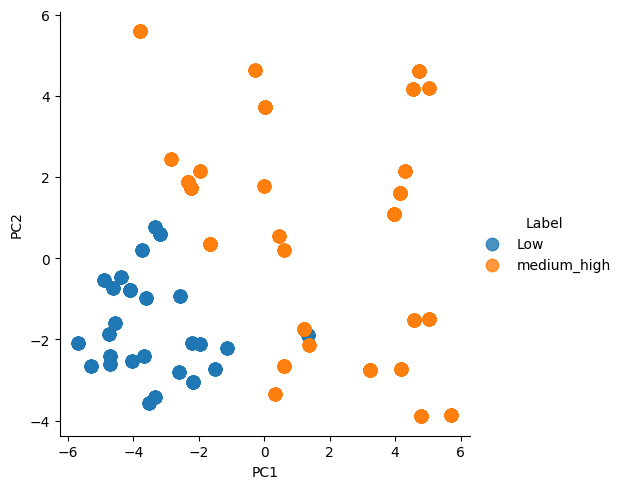

In [12]:
x=df_low_others.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_low_others["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [13]:
pc_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.136868e-16,-2.131628e-16,-1.012523e-16,-9.370282e-17,-2.540190e-16
std,3.423509e+00,2.663539e+00,2.541908e+00,1.452945e+00,1.392789e+00
min,-5.687299e+00,-3.895020e+00,-5.363455e+00,-3.000129e+00,-3.219016e+00
25%,-2.867717e+00,-2.433932e+00,-1.614765e+00,-1.066311e+00,-6.934872e-01
50%,-1.359993e-02,-1.218983e-01,-5.609835e-02,-3.118375e-01,1.316261e-01
75%,3.950959e+00,1.782838e+00,1.289162e+00,5.687317e-01,7.140060e-01
max,5.716931e+00,5.588596e+00,5.373867e+00,5.195150e+00,5.164393e+00


In [14]:
plot_PCA_3D(pc_df, pca)

#### Separate by classes [High vs (Low & Medium)]

In [15]:
df_high_others = df.copy()
df_high_others["Level"] = df['Level'].replace(["Medium","Low"],"medium_low")
#df_low_others["Level"] = df_low_others['Level'].replace("High","medium_high")
pd.unique(df_high_others['Level'])


array(['medium_low', 'High'], dtype=object)

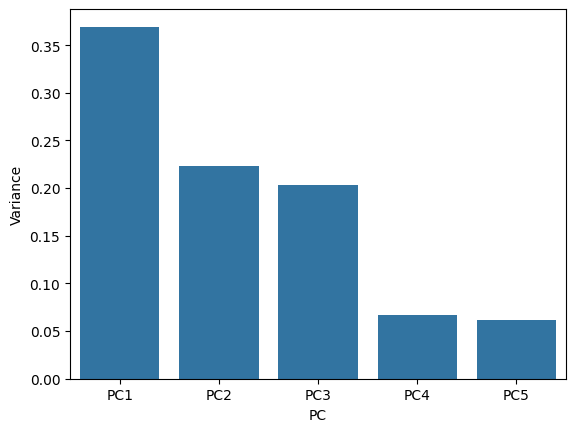

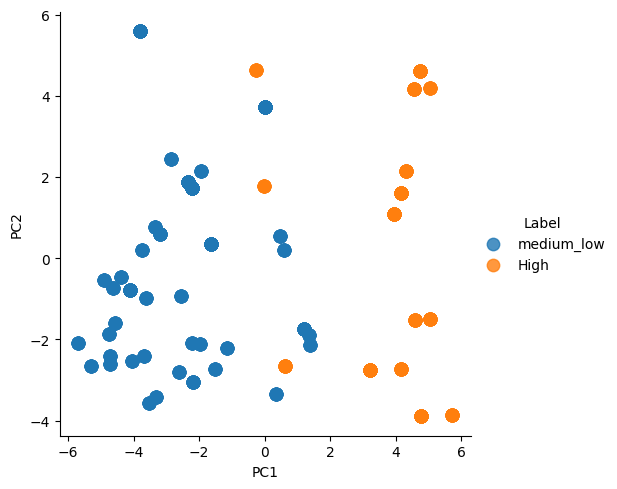

In [16]:
x=df_high_others.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_high_others["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [17]:
plot_PCA_3D(pc_df, pca)

- Medium vs (Low & High)

In [18]:
df_medium_others = df.copy()
df_medium_others["Level"] = df['Level'].replace(["Low","High"],"Low_high")
pd.unique(df_medium_others['Level'])


array(['Low_high', 'Medium'], dtype=object)

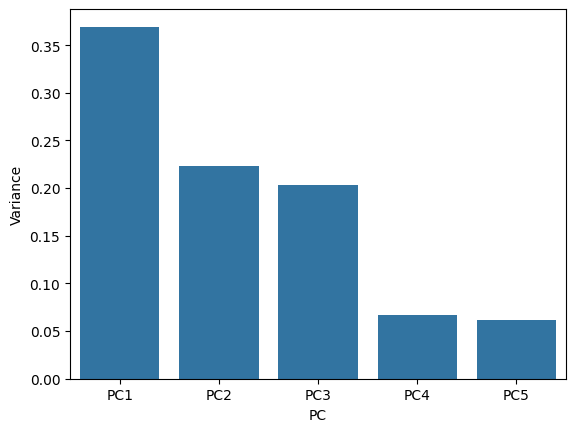

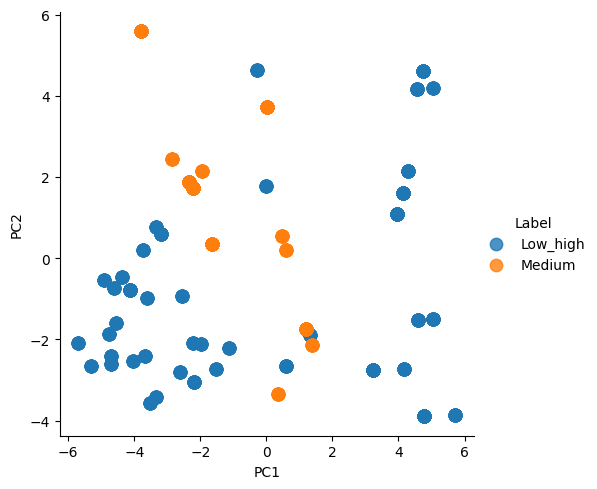

In [19]:
x=df_medium_others.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_medium_others["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [20]:
plot_PCA_3D(pc_df, pca)

#### Removing one of the classes and seeing the PCA effect
- Low vs High 

In [21]:
df_low_high = df.loc[df["Level"].isin(["Low","High"])]
pd.unique(df_low_high['Level'])


array(['Low', 'High'], dtype=object)

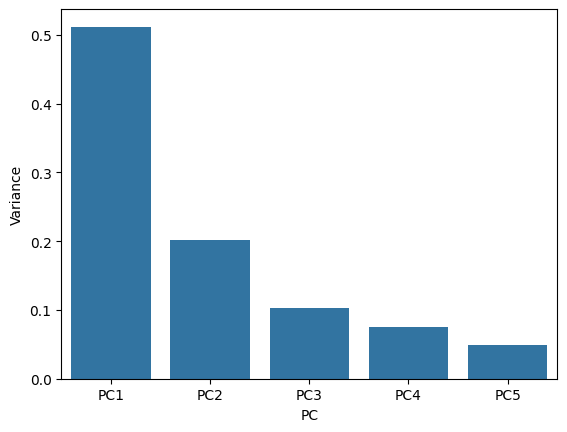

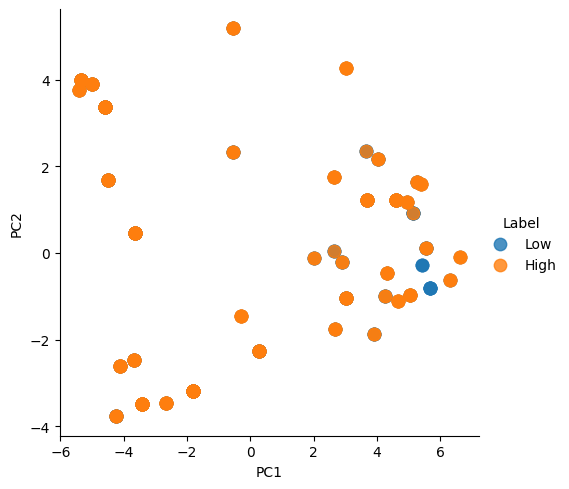

In [22]:
x=df_low_high.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_low_high["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [23]:
plot_PCA_3D(pc_df, pca)

- Low vs Medium

In [24]:
df_low_medium = df.loc[df["Level"].isin(["Low","Medium"])]
pd.unique(df_low_medium['Level'])


array(['Low', 'Medium'], dtype=object)

['Low' 'Medium']


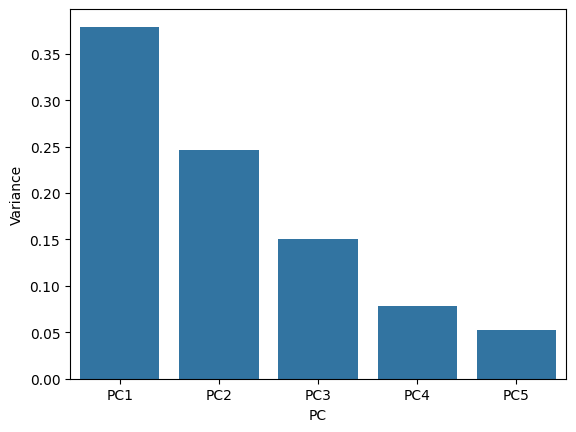

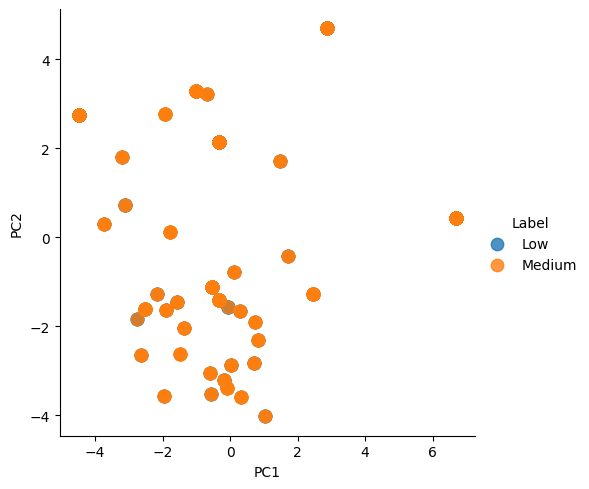

In [25]:
df_low_medium = df.loc[df["Level"].isin(["Low","Medium"])]
print(pd.unique(df_low_medium['Level']))
x=df_low_medium.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_low_medium["Level"]
n_comp=5
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [26]:
plot_PCA_3D(pc_df, pca)

- Medium vs High

In [27]:
df_medium_high = df.loc[df["Level"].isin(["Medium","High"])]
pd.unique(df_medium_high['Level'])


array(['Medium', 'High'], dtype=object)

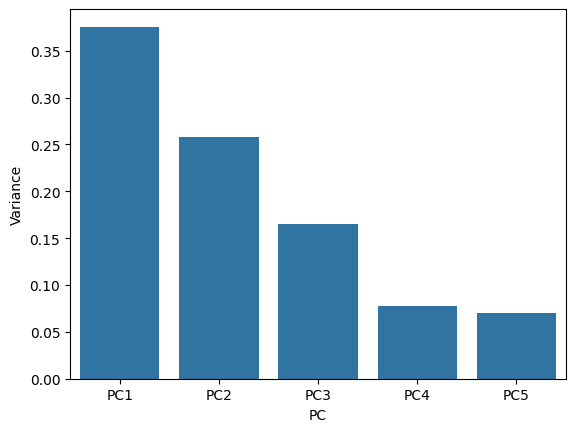

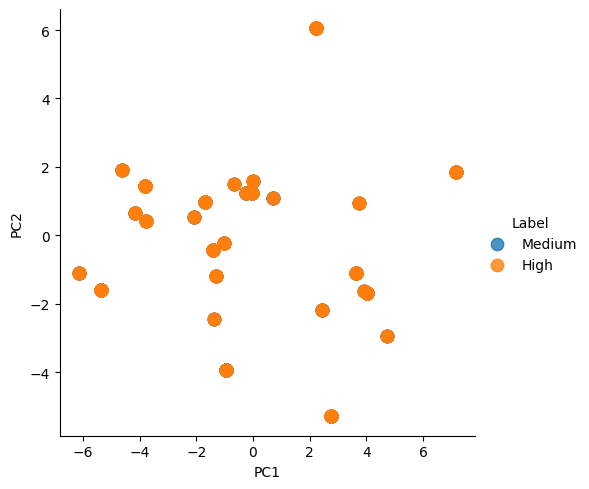

In [28]:
x=df_medium_high.drop(["Patient Id","Level"], axis=1)
x=x[feature_set_dt]
y=df_medium_high["Level"]
n_comp=5
pc_list = [f"PC{i+1}" for i in range(n_comp)]
pc_df, pca, pc_list= pca_transform(x, y, n_comp)
plot_PCA_2D(pc_df, pca, pc_list)

In [29]:
plot_PCA_3D(pc_df, pca)

## LDA for checking separability

Using all features

Low
Medium


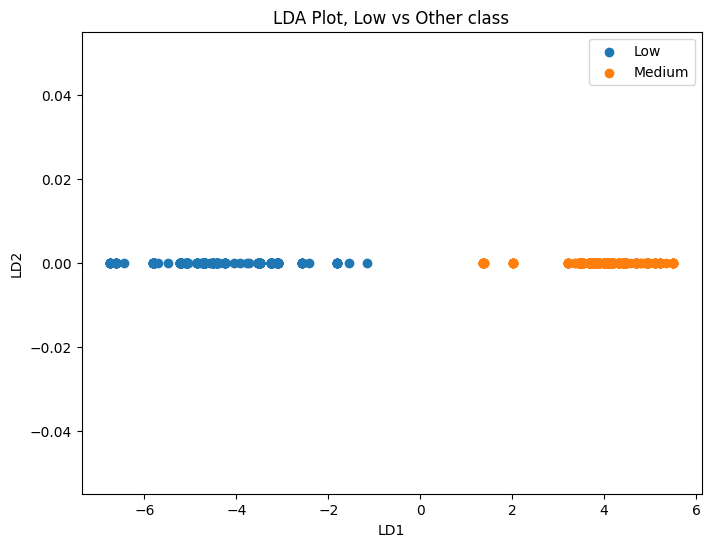

In [30]:
# Using all features, but 1vsall each label
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# filtered_df = df[df['Level'] != 'High'] #remove the 'High' label

# X = df.drop(["Patient Id","Level"], axis=1)
# y = df_low_others["Level"]

'''
Note I also tried using the df_low_others, but the "Low" didn't quite separate.
I think it's because LDA is trying to maximize the class centroids AND minimizing variance within each class.
Thus renaming Med and High into Med-High kinda create bias distribution, probably making LDA prioritize the the latter.
Better separation if I just remove High.
'''

X = df_low_medium.drop(["Patient Id","Level"], axis=1)
y = df_low_medium["Level"]



lda = LinearDiscriminantAnalysis()

df_lda = lda.fit(X,y)
df_lda = lda.transform(X)


plt.figure(figsize=(8, 6))
for label in np.unique(y):
    print(label)
    plt.scatter(df_lda[y == label, 0], np.zeros_like(df_lda[y == label, 0]), label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Plot, Low vs Other class')
plt.legend()

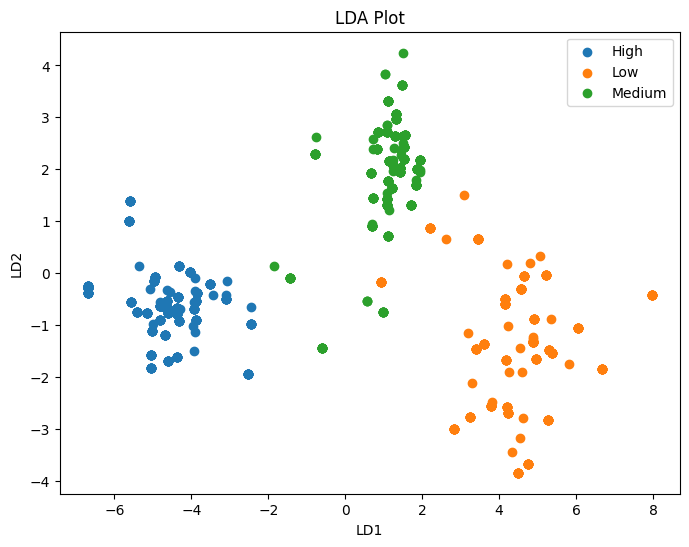

In [31]:
# X = df[feature_set_dt]
X = df.drop(["Patient Id","Level"], axis=1)
y = df["Level"]

lda = LinearDiscriminantAnalysis()

df_lda = lda.fit(X,y)

df_lda = lda.transform(X)
explained_var_ratio=lda.explained_variance_ratio_
cumulative_var_ratio=np.cumsum(explained_var_ratio)

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(df_lda[y == label, 0], df_lda[y == label, 1], label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Plot')
plt.legend()
plt.show()



,Cumulative Variance Ratio,Explained Variance Ratio
0,0.884108,0.884108
1,1.000000,0.115892


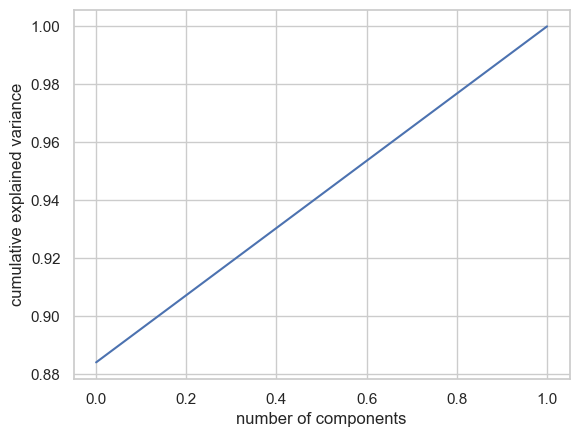

In [32]:
lda_df = pd.DataFrame()
lda_df['Cumulative Variance Ratio'] = cumulative_var_ratio
lda_df['Explained Variance Ratio'] = explained_var_ratio
display(lda_df)
sns.set(style='whitegrid')
plt.plot(cumulative_var_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

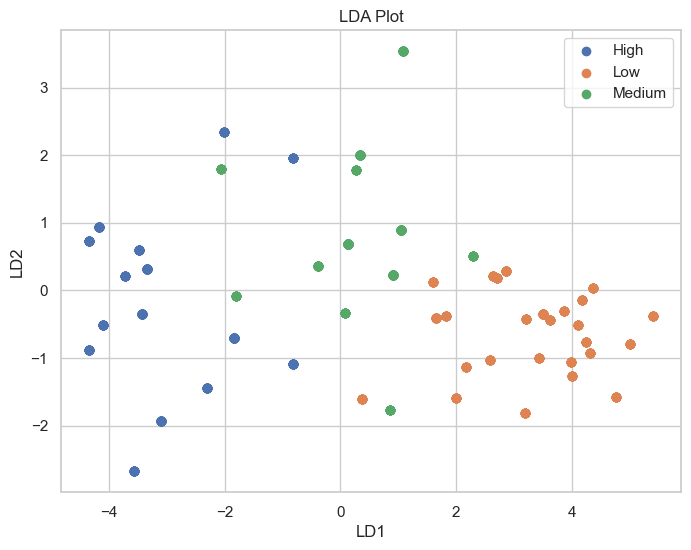

In [33]:
X = df[feature_set_dt]
y = df["Level"]

lda = LinearDiscriminantAnalysis()

df_lda = lda.fit(X,y)
df_lda = lda.transform(X)


plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(df_lda[y == label, 0], df_lda[y == label, 1], label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Plot')
plt.legend()
plt.show()



In [34]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# linear_clf = svm.SVC(probability=True)
# X = df[feature_set_dt]
X = df.drop(["Patient Id","Level"], axis=1)

# le = LabelEncoder()
# df["Level"] = le.fit_transform(df["Level"])
df['Level'] = df['Level'].apply(lambda x: ["Low", "Medium", "High"].index(x))
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [35]:
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train_lda, y_train)
y_pred = linear_clf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.97


/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_46750/3871851178.py:16: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



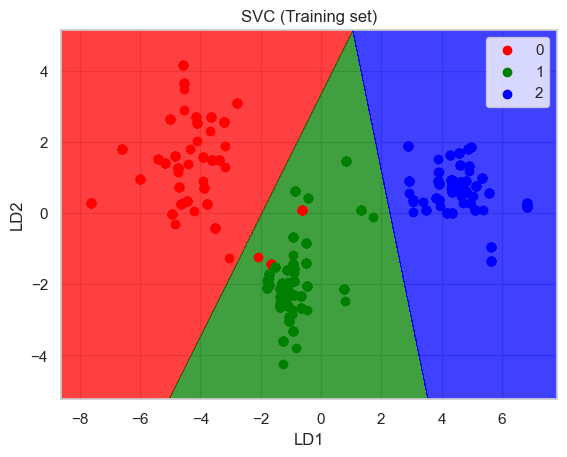

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_lda, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
input_array = np.column_stack((X1.ravel(), X2.ravel()))
Z = linear_clf.predict(input_array)
Z = Z.reshape(X1.shape)
Z = np.array(Z, dtype=float)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_46750/4021899550.py:15: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



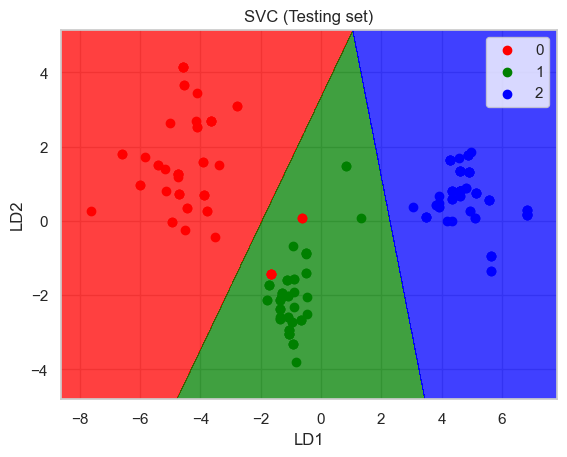

In [37]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_lda, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
input_array = np.column_stack((X1.ravel(), X2.ravel()))
Z = linear_clf.predict(input_array)
Z = Z.reshape(X1.shape)
Z = np.array(Z, dtype=float)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Testing set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

#### Linear Separation with feature_set_dt

In [38]:
X = df[feature_set_dt]
le = LabelEncoder()
df["Level"] = le.fit_transform(df["Level"])
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train_lda, y_train)
y_pred = linear_clf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.98


/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_46750/158359765.py:16: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



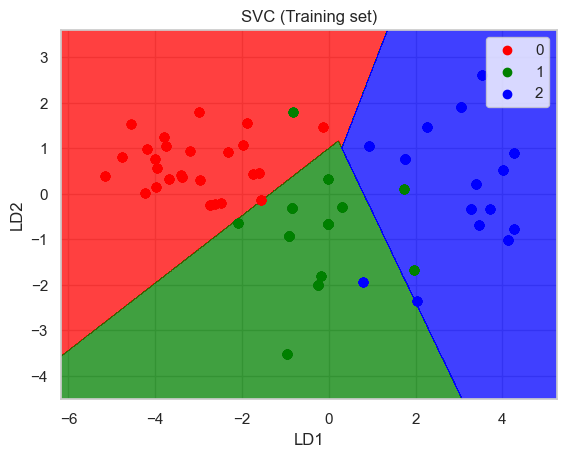

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_lda, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
input_array = np.column_stack((X1.ravel(), X2.ravel()))
Z = linear_clf.predict(input_array)
Z = Z.reshape(X1.shape)
Z = np.array(Z, dtype=float)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()



/var/folders/9x/00rwcm8x4897s1m2h7wcc84h0000gn/T/ipykernel_46750/3370304623.py:15: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



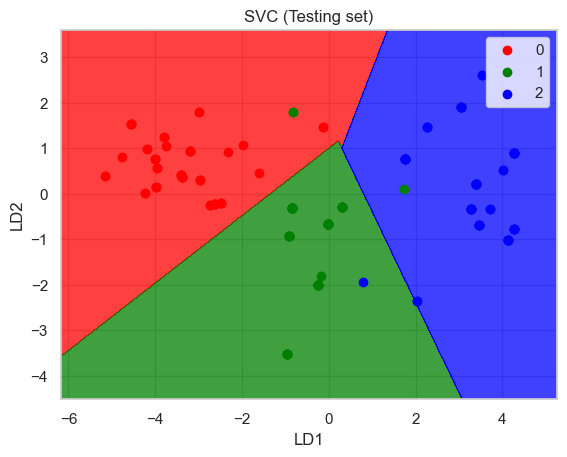

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_lda, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
input_array = np.column_stack((X1.ravel(), X2.ravel()))
Z = linear_clf.predict(input_array)
Z = Z.reshape(X1.shape)
Z = np.array(Z, dtype=float)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Testing set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


#### Random trying stuff

In [41]:
f_select_k = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                    'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
                    'Chest Pain', 'Coughing of Blood']
f_pca = ['Age','Alcohol use','Smoking','chronic Lung Disease','Fatigue',
            'Coughing of Blood','Chest Pain','Genetic Risk','OccuPational Hazards']

In [42]:
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']


In [43]:
selected_features = df[f_pca]
selected_features.shape

(1000, 14)

In [44]:
from sklearn.model_selection import train_test_split
X = selected_features
# Can replace this with our features when we have
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# linear_clf = svm.SVC(probability=True)
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [46]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_clf, X, y, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 0.999


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X = features
# X= scaler.fit_transform(X)

X[['Age']] = scaler.fit_transform(X[['Age']])
# X_test_scaled = scaler.transform(X_test)
# Can replace this with our features when we have
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train, y_train)
# Predicting on the test set
y_pred = logistic_clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  1.0


/Users/eugenegan/Documents/GitHub_repo/Lung_Cancer_Prediction/ML_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [48]:
logistic_clf.intercept_
logistic_clf.coef_

array([[-0.52343336,  0.70591404,  0.25923539, -0.9542621 ,  0.13292445,
         0.83415936, -0.97002328, -0.23859327, -0.04453858, -0.62088293,
         0.88611633, -1.07315572,  0.61547441, -0.3342763 , -1.31159141,
         0.69500624, -0.22443179, -0.13126628, -0.72319452, -0.82150569,
        -0.10081418, -0.01058152, -0.02897091],
       [ 0.4916989 ,  0.11538716, -0.93167805, -0.64932951,  1.61443887,
        -0.85037526,  1.86843274,  0.32402212, -0.50885831, -0.01501647,
        -0.14960048, -0.01110702, -0.52728258, -0.04694377,  0.12875879,
        -0.3757595 , -0.04639639,  0.33870543,  0.13371883,  0.42546505,
         0.23312518,  0.18848563,  0.55222385],
       [ 0.03173445, -0.8213012 ,  0.67244266,  1.60359161, -1.74736332,
         0.0162159 , -0.89840946, -0.08542885,  0.55339689,  0.6358994 ,
        -0.73651585,  1.08426274, -0.08819183,  0.38122007,  1.18283262,
        -0.31924674,  0.27082818, -0.20743915,  0.58947569,  0.39604064,
        -0.132311  , -0.1779